In [115]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import mutual_info_regression, SelectPercentile, SelectKBest
import seaborn as sns
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV

In [67]:
#Loading Dataset
dataset = fetch_california_housing(as_frame = True)
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [68]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [69]:
dataset.data
dataset.target
dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [70]:
x = dataset['data']
y = dataset['target']
feature_names = dataset['feature_names']

In [71]:
mi = mutual_info_regression(x, y)

In [72]:
x.shape

(20640, 8)

In [73]:
y.shape

(20640,)

In [74]:
x.head(20)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [75]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


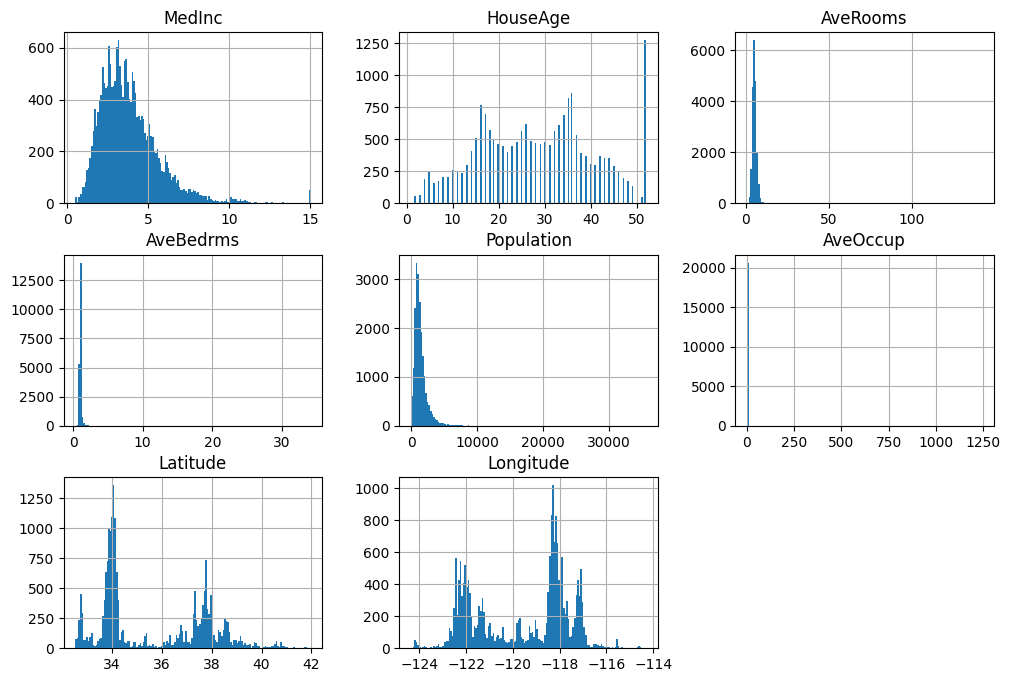

In [76]:
x.hist(bins = 150, figsize=(12,8))
plt.show()

## Filterbased Method

###Using all features

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [86]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_err = r2_score(y_test, y_pred)
mean_sq_err = mean_squared_error(y_test, y_pred)
print(r2_err,mean_sq_err)

0.6290935822960764 0.4988700713686333


###Corelation Method

In [87]:
x_pred = pd.DataFrame(x, columns=feature_names)
x_pred

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [88]:
x_pred.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


<Axes: >

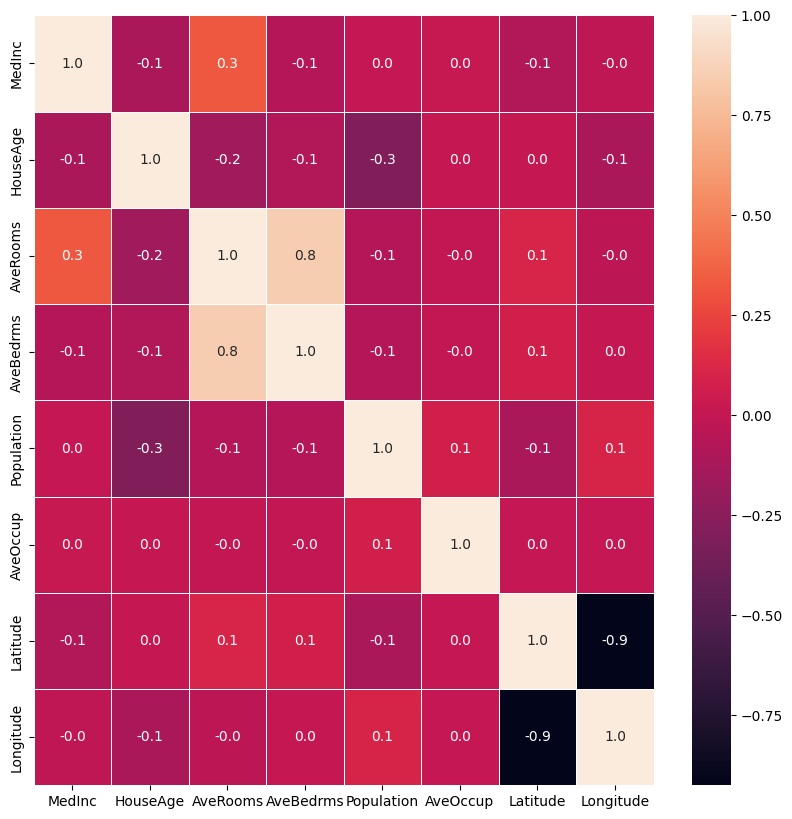

In [89]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(x_pred.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [93]:
x1 = x.drop(['AveRooms'], axis=1)
x1.head(20)

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,0.990196,1551.0,2.172269,37.84,-122.25


In [94]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.2)

In [95]:
model = LinearRegression()
model.fit(x1_train, y1_train)
y1_pred = model.predict(x1_test)
r2_err = r2_score(y1_test, y1_pred)
mean_sq_err = mean_squared_error(y1_test, y1_pred)
print(r2_err,mean_sq_err)

0.5818553282439833 0.5599211499768614


In [96]:
x1_pred = pd.DataFrame(x1, columns=feature_names)
x1_pred

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,NaN,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,NaN,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,NaN,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,NaN,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,NaN,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,NaN,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,NaN,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,NaN,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,NaN,1.171920,741.0,2.123209,39.43,-121.32


<Axes: >

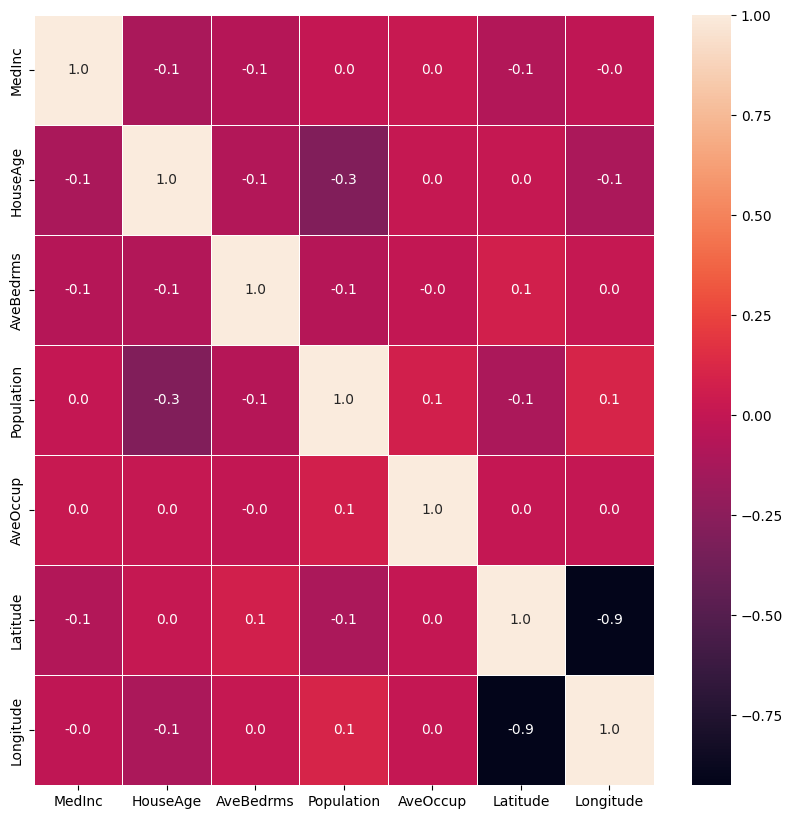

In [97]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(x1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [99]:
x2 = x1.drop(['Population','HouseAge'], axis=1)
x2

,MedInc,AveBedrms,AveOccup,Latitude,Longitude
0,8.3252,1.023810,2.555556,37.88,-122.23
1,8.3014,0.971880,2.109842,37.86,-122.22
2,7.2574,1.073446,2.802260,37.85,-122.24
3,5.6431,1.073059,2.547945,37.85,-122.25
4,3.8462,1.081081,2.181467,37.85,-122.25
...,...,...,...,...,...
20635,1.5603,1.133333,2.560606,39.48,-121.09
20636,2.5568,1.315789,3.122807,39.49,-121.21
20637,1.7000,1.120092,2.325635,39.43,-121.22
20638,1.8672,1.171920,2.123209,39.43,-121.32


In [100]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.2)
model = LinearRegression()
model.fit(x2_train, y2_train)
y2_pred = model.predict(x2_test)
r2_err = r2_score(y2_test, y2_pred)
mean_sq_err = mean_squared_error(y2_test, y2_pred)
print(r2_err,mean_sq_err)

0.5868362690867832 0.5512026614709469


<Axes: >

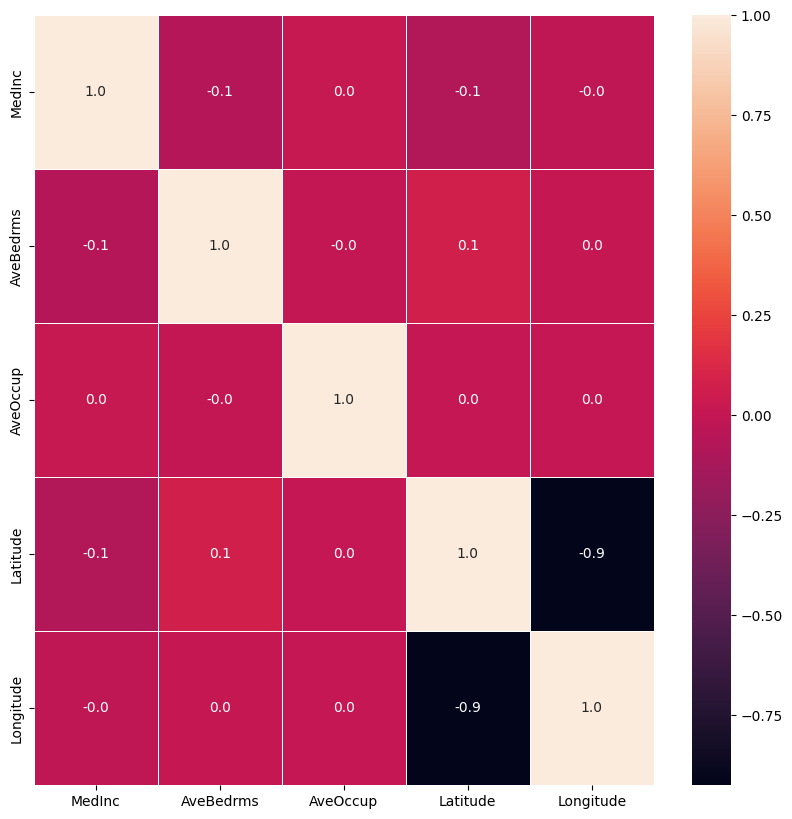

In [101]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(x2.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

So, after removing 'AveRooms' as it was highly corelated with 'Avebedrms'(i.e: 0.8), we got lasser R2 error than all features. Hence by this backword elimination method we got this best result.
i.e  0.5818553282439833


Further we will try other methods.


## Wrapper Based Methods

In [109]:
california_hm = fetch_california_housing()
x, y = california_hm.data, california_hm.target
estimator = Lasso()
selector = RFE(estimator, n_features_to_select=5, step=1).fit(x, y)
print(selector.ranking_, )

[1 1 4 3 1 2 1 1]


In [112]:
x_new = selector.transform(x)
print(x_new.shape)

(20640, 5)


In [114]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

0.6058545918478038


#### Sequential Feature Selection
#####Forward Method

In [117]:
# Regression
california_hm = fetch_california_housing()
x, y = california_hm.data, california_hm.target
ridge = RidgeCV().fit(x, y)

In [119]:
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select="auto", direction="forward"
).fit(x, y)

print(sfs_forward)

SequentialFeatureSelector(estimator=RidgeCV(), n_features_to_select='auto')


In [121]:
x_new = sfs_forward.transform(x)
x_new.shape

(20640, 4)

In [123]:
## Important: You can now use any model with these newly selected features
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

0.5477581854342397


##Mutual Information Method

In [50]:
mi = mutual_info_regression(x, y)
print(mi)

[0.38738937 0.03153276 0.10353073 0.02406409 0.02042876 0.07330591
 0.3714848  0.40299153]


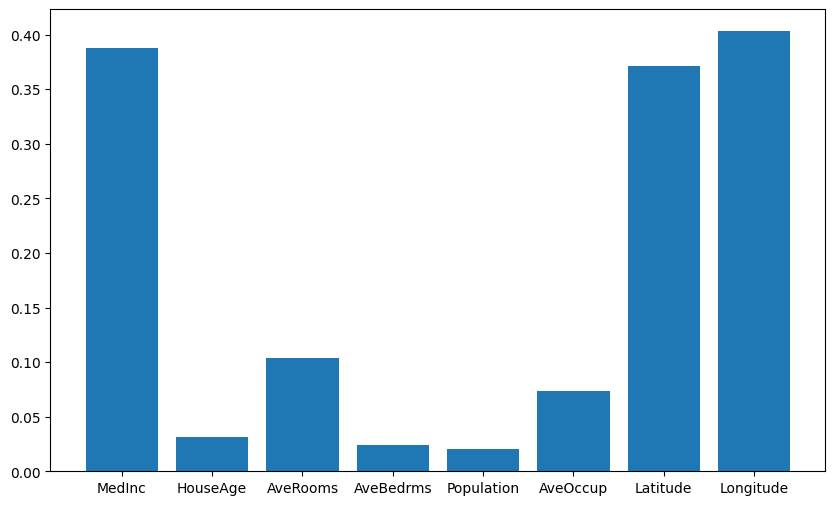

In [51]:
# Visualise Feature Selection
plt.figure(figsize=(10, 6))
plt.bar(feature_names, mi)
plt.show()

We can see Median Income and location is highly corelatable with Y.

In [64]:
# Option 1
x_new = SelectPercentile(mutual_info_regression, percentile=50).fit_transform(x, y)
print(x_new.shape)

(20640, 4)


In [65]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)

In [66]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_err = r2_score(y_test, y_pred)
mean_sq_err = mean_squared_error(y_test, y_pred)
print(r2_err,mean_sq_err)

0.5811540858030075 0.5615679360824308


### PCA

In [131]:
california_hm = fetch_california_housing()
x = dataset['data']
y = dataset['target']
feature_names = dataset['feature_names']


In [134]:
x.shape

(20640, 8)

In [132]:
from sklearn.decomposition import PCA
X_new = PCA(n_components=4, svd_solver='full').fit_transform(x)
print(X_new.shape)

(20640, 4)


In [135]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))
mean_sq_err = mean_squared_error(y_test, y_pred)
print(mean_sq_err)


0.01250344112932833
1.3189825740805052
